## <b>KGLiDS APIs</b>

In [1]:
from api.api import KGLiDS
import pandas as pd
kglids = KGLiDS(endpoint='206.12.92.210', port=5820)

Connected to Stardog: https://cloud.stardog.com/


In [2]:
kglids.show_graph_info()

Information captured: 


,Datasets,Pipelines,Tables,Columns
0,101,969,418,9502



- <b><i> Running Adhoc-queries on our graph!</i></b> 

##### <b>1.  Customized queries </b>

In [3]:
query = """ 
SELECT ?source {
?source_id rdf:type    kglids:Source    ;
           schema:name ?source          . } """
kglids.query(query)

,source
0,kaggle


- <b><i> Pre-defined queries on our graph!</i></b> 

##### <b><i>Not comfortable with Sparql? No worries!</i></b> 
###### You can use several KGLiDS APIs to discover useful insights that remain locked inside your Data
<hr><br>

Note: 
- All query result(s) are returned in a form of <code>pandas.DataFrame</code> 
- KGLiDS is a transparent system, you can see the queries used by the system by setting <code>show_query = True</code> in case of every API you wish to use.

##### <b>2.  Retrieving dataset(s) </b>

In [4]:
kglids.get_datasets_info()

,Dataset,Number_of_tables
0,COVID-19 Corona Virus India Dataset,8
1,COVID-19 Dataset,6
2,COVID-19 Healthy Diet Dataset,5
3,COVID-19 Indonesia Dataset,1
4,COVID-19 World Vaccination Progress,2
...,...,...
96,uciml.red-wine-quality-cortez-et-al-2009,22
97,unitednations.international-greenhouse-gas-emi...,3
98,upadorprofzs.testes,8
99,vitaliymalcev.russian-passenger-air-service-20...,14


##### <b>3.  Retrieving table(s) </b>

In [5]:
kglids.get_tables_info()

Showing all available table(s): 


,Table,Dataset,Path_to_table
0,state_level_daily.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
1,state_level_latest.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
2,patients_data.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
3,tests_day_wise.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
4,nation_level_daily.csv,COVID-19 Corona Virus India Dataset,/data/shubham/datasets/data_lake/COVID-19 Coro...
...,...,...,...
413,pastry inventory.csv,ylchang.coffee-shop-sample-data-1113,/data/shubham/datasets/data_lake/ylchang.coffe...
414,201904 sales reciepts.csv,ylchang.coffee-shop-sample-data-1113,/data/shubham/datasets/data_lake/ylchang.coffe...
415,sales_outlet.csv,ylchang.coffee-shop-sample-data-1113,/data/shubham/datasets/data_lake/ylchang.coffe...
416,product.csv,ylchang.coffee-shop-sample-data-1113,/data/shubham/datasets/data_lake/ylchang.coffe...


In [6]:
kglids.get_tables_info(dataset='UK COVID-19 Data')


Showing table(s) for 'UK COVID-19 Data' dataset: 


,Table,Dataset,Path_to_table
0,UK_Devolved_Nations_COVID_Dataset.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
1,UK_Local_Authority_UTLA_COVID_Dataset.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
2,England_Regions_COVID_Dataset.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
3,UK_National_Total_COVID_Dataset.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
4,NEW_Official_Population_Data_ONS_mid-2019.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...
5,Populations_for_UK_and_Devolved_Nations.csv,UK COVID-19 Data,/data/shubham/datasets/data_lake/UK COVID-19 D...


###### <b>Enriching table(s) with more columns using KGLiDS's recommendations </b>

##### <b>4. Recommending tables by column name search</b>

In [7]:
df = kglids.search_tables_on(conditions=[['player', 'club']])
df

Showing recommendations as per the following conditions:
Condition =  [['player', 'club']]


,Dataset,Table,Number_of_columns,Number_of_rows,Path_to_table
0,FIFA 21 complete player dataset,players_21.csv,106.0,18944.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
1,FIFA 21 complete player dataset,players_20.csv,106.0,18483.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
2,FIFA 20 complete player dataset,players_20.csv,104.0,18278.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
3,FIFA 21 complete player dataset,players_19.csv,106.0,18085.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
4,FIFA 20 complete player dataset,players_19.csv,104.0,17770.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
5,FIFA 20 complete player dataset,players_18.csv,104.0,17592.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
6,FIFA 21 complete player dataset,players_18.csv,106.0,17954.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
7,FIFA 21 complete player dataset,players_17.csv,106.0,17597.0,/data/shubham/datasets/data_lake/FIFA 21 compl...
8,FIFA 20 complete player dataset,players_17.csv,104.0,17009.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
9,FIFA 20 complete player dataset,players_16.csv,104.0,14881.0,/data/shubham/datasets/data_lake/FIFA 20 compl...


##### <b>5. Recommending unionable tables (based on column names)</b>

In [8]:
recommendations_union = kglids.recommend_k_unionable_tables(df.iloc[0], k = 10)
recommendations_union

Showing the top-10 unionable table recommendations:


,Dataset,Recommended_table,Score,Path_to_table
0,FIFA 20 complete player dataset,players_20.csv,280.659,/data/shubham/datasets/data_lake/FIFA 20 compl...
1,FIFA 20 complete player dataset,players_19.csv,238.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
2,FIFA 20 complete player dataset,players_18.csv,238.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
3,FIFA 20 complete player dataset,players_17.csv,237.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
4,FIFA 20 complete player dataset,players_15.csv,235.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
5,FIFA 20 complete player dataset,players_16.csv,235.174,/data/shubham/datasets/data_lake/FIFA 20 compl...
6,FIFA22 OFFICIAL DATASET,FIFA19_official_data.csv,65.596,/data/shubham/datasets/data_lake/FIFA22 OFFICI...
7,FIFA22 OFFICIAL DATASET,FIFA17_official_data.csv,63.561,/data/shubham/datasets/data_lake/FIFA22 OFFICI...
8,FIFA22 OFFICIAL DATASET,FIFA18_official_data.csv,63.561,/data/shubham/datasets/data_lake/FIFA22 OFFICI...
9,FIFA22 OFFICIAL DATASET,FIFA22_official_data.csv,58.263,/data/shubham/datasets/data_lake/FIFA22 OFFICI...


##### <b>6. Recommending unionable tables (based on column values)</b>

In [9]:
recommendations_join = kglids.recommend_k_joinable_tables(df.iloc[0], k = 5)
recommendations_join

Showing the top-3 joinable table recommendations:


,Dataset,Recommended_table,Score,Path_to_table
0,FIFA 20 complete player dataset,players_20.csv,2.0,/data/shubham/datasets/data_lake/FIFA 20 compl...
1,FIFA22 OFFICIAL DATASET,FIFA22_official_data.csv,1.0,/data/shubham/datasets/data_lake/FIFA22 OFFICI...
2,FIFA22 OFFICIAL DATASET,FIFA21_official_data.csv,1.0,/data/shubham/datasets/data_lake/FIFA22 OFFICI...


##### <b>7. Visualizing the path between two joinable tables</b>

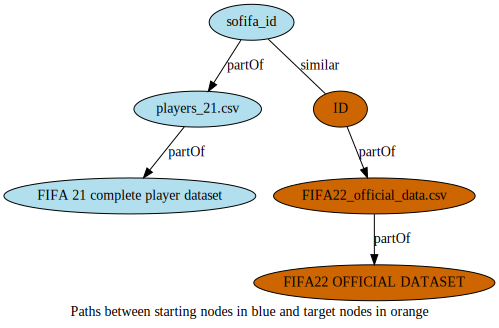

In [10]:
kglids.get_path_between_tables(df.iloc[0], recommendations_join.iloc[1], hops=1)

##### <b> Enrichment by Join </b>

##### <b>8. Search pipelines</b> 

In [12]:
kglids.get_pipelines_info()

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,How Models Work,iabhishekofficial.mobile-price-classification,DanB,2022-01-05 13:51:41,5315,0.834509
1,Your First Machine Learning Model,iabhishekofficial.mobile-price-classification,DanB,2021-11-09 00:01:04,2909,0.634321
2,Model Validation,iabhishekofficial.mobile-price-classification,DanB,2021-11-09 00:00:51,2659,0.765677
3,Underfitting and Overfitting,iabhishekofficial.mobile-price-classification,DanB,2021-11-09 00:01:33,2502,0.644229
4,Machine Learning Tutorial for Beginners,uciml.biomechanical-features-of-orthopedic-pat...,DATAI,2018-07-24 14:43:45,2129,0.895508
...,...,...,...,...,...,...
964,Predicting EPL table for 2019-2020,idoyo92.epl-stats-20192020,anupriyo,2020-07-28 10:16:17,0,0.987387
965,notebookc8a19c85bb,fedesoriano.hepatitis-c-dataset,Moschopoulos Apo,2021-07-15 14:32:57,0,0.816314
966,Neural nets VS KNN,idoyo92.epl-stats-20192020,Karthiks061992,2020-05-14 21:32:25,0,0.514592
967,Project-EDA EPL2020,idoyo92.epl-stats-20192020,Ishdeep Chadha,2020-05-24 07:48:36,0,0.600902


In [13]:
kglids.get_pipelines_info(author='DanB')

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,How Models Work,iabhishekofficial.mobile-price-classification,DanB,2022-01-05 13:51:41,5315,0.834509
1,Your First Machine Learning Model,iabhishekofficial.mobile-price-classification,DanB,2021-11-09 00:01:04,2909,0.634321
2,Model Validation,iabhishekofficial.mobile-price-classification,DanB,2021-11-09 00:00:51,2659,0.765677
3,Underfitting and Overfitting,iabhishekofficial.mobile-price-classification,DanB,2021-11-09 00:01:33,2502,0.644229
4,Random Forests,iabhishekofficial.mobile-price-classification,DanB,2021-11-09 00:03:02,1710,0.618779
5,Basic Data Exploration,iabhishekofficial.mobile-price-classification,DanB,2021-11-09 00:01:19,1551,0.535365
6,Explore Your Data,dansbecker.home-data-for-ml-course,DanB,2019-01-23 01:07:33,1328,0.695214
7,Basic Data Exploration Daily,iabhishekofficial.mobile-price-classification,DanB,2019-08-24 02:41:50,95,0.616984
8,How Models Work Daily,iabhishekofficial.mobile-price-classification,DanB,2019-08-24 02:42:02,71,0.947072
9,Model Validation Daily,iabhishekofficial.mobile-price-classification,DanB,2019-08-24 02:41:47,61,0.918014


#### <b>9. Most recent pipeline</b> 

In [14]:
kglids.get_most_recent_pipeline()

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,Twitch Streamers Analytics using Python,aayushmishra1512.twitchdata,Aleix Castellvi,2022-02-16 14:05:16,2,0.986247


In [15]:
kglids.get_most_recent_pipeline(dataset='fedesoriano.hepatitis-c-dataset')

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,Liver Disease Analysis: EDAâ¡ï¸SMOTEâ¡ï¸OP...,fedesoriano.hepatitis-c-dataset,caleb reigada,2022-02-14 12:51:35,13,0.581313


#### <b>10.<i> Top-k</i> scoring pipelines</b> 

In [16]:
kglids.get_top_k_scoring_pipelines_for_dataset(k=5)

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,hepatitis c,fedesoriano.hepatitis-c-dataset,RATNADEEP GAWADE,2021-07-13 19:50:43,1,0.999835
1,Comprehensive EDA + Predicting Subscriber Count,andrewmvd.udemy-courses,Sayar Banerjee,2020-05-23 15:23:34,22,0.999729
2,notebooke72847ec86,andrewmvd.udemy-courses,semih Ã§Ä±nar,2021-07-19 22:23:00,11,0.999695
3,Topic Modeling with LDA,kulgen.elon-musks-tweets,mohamed elbeih,2021-02-21 16:22:46,0,0.999219
4,India Import and Export,lakshyaag.india-trade-data,Mysterious9912,2019-10-13 13:08:48,3,0.998829


In [17]:
kglids.get_top_k_scoring_pipelines_for_dataset(dataset='fedesoriano.hepatitis-c-dataset', k=5)

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,hepatitis c,fedesoriano.hepatitis-c-dataset,RATNADEEP GAWADE,2021-07-13 19:50:43,1,0.999835
1,Starter: Hepatitis C Dataset c674c472-8,fedesoriano.hepatitis-c-dataset,Kaggle Kerneler,2020-12-21 17:02:06,2,0.985005
2,Modelo Preditivo DoenÃ§as HepÃ¡ticas,fedesoriano.hepatitis-c-dataset,Ives Santos,2021-09-05 21:00:40,1,0.968082
3,Hepatitis_c_pred,fedesoriano.hepatitis-c-dataset,Sanket Sharma,2021-07-23 09:02:09,2,0.954447
4,Liver Disorders Storytelling,fedesoriano.hepatitis-c-dataset,Mohammed Omda,2022-01-19 21:26:46,24,0.928420


#### <b>11. Search classifiers used in a dataset</b> 

In [18]:
df = kglids.search_classifier(dataset='fedesoriano.hepatitis-c-dataset')
df.head(10)

,Pipeline,Classifier,Score
0,Modelo Preditivo DoenÃ§as HepÃ¡ticas,GradientBoostingClassifier,0.968082
1,Modelo Preditivo DoenÃ§as HepÃ¡ticas,RandomForestClassifier,0.968082
2,Modelo Preditivo DoenÃ§as HepÃ¡ticas,DecisionTreeClassifier,0.968082
3,Modelo Preditivo DoenÃ§as HepÃ¡ticas,LogisticRegression,0.968082
4,Hepatitis_c_pred,SVC,0.954447
5,Hepatitis_c_pred,RandomForestClassifier,0.954447
6,Hepatitis_c_pred,DecisionTreeClassifier,0.954447
7,Hepatitis_c_pred,LogisticRegression,0.954447
8,EDA and hepatitis C prediction using RFs,RandomForestClassifier,0.848565
9,notebookc8a19c85bb,LogisticRegression,0.816314


#### <b>12. Fetch hyperparameters </b> 

In [19]:
kglids.get_hyperparameters(df.iloc[8])

,RandomForestClassifier_hyperparameter,Value
0,class_weight,balanced
1,n_jobs,None
2,random_state,100
3,n_estimators,100


#### <b>13. Visualize library utilization</b> 

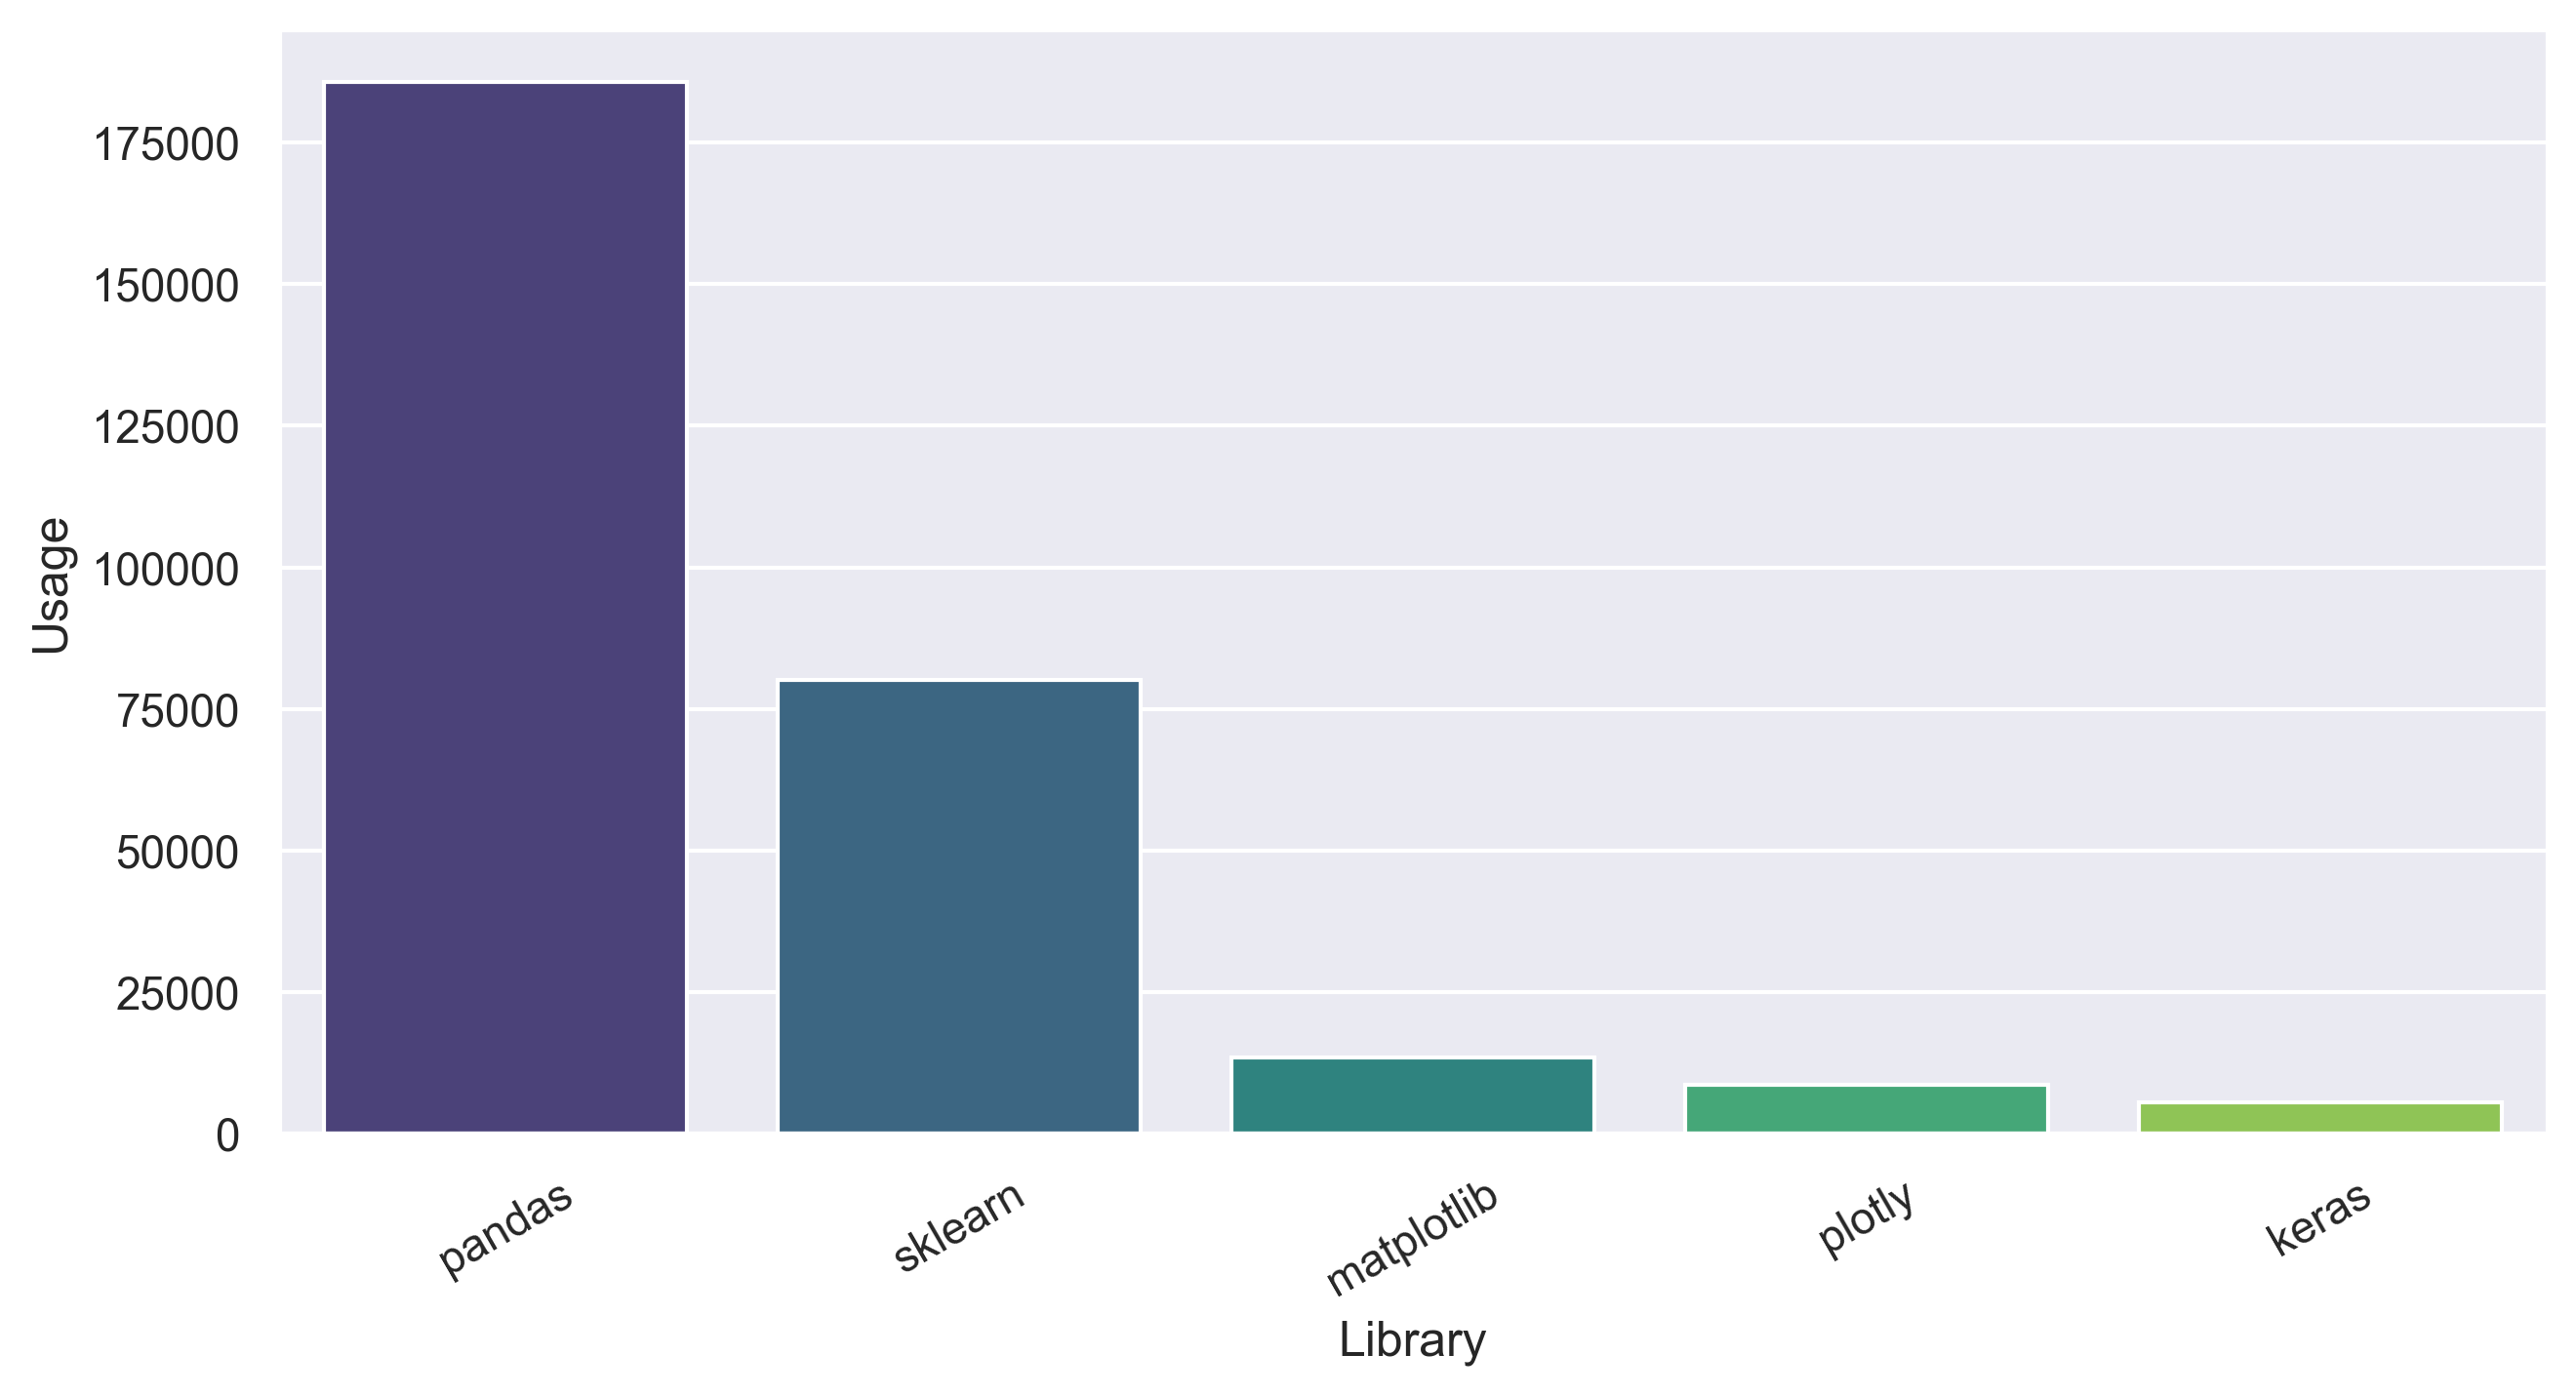

In [20]:
kglids.get_top_k_library_used()

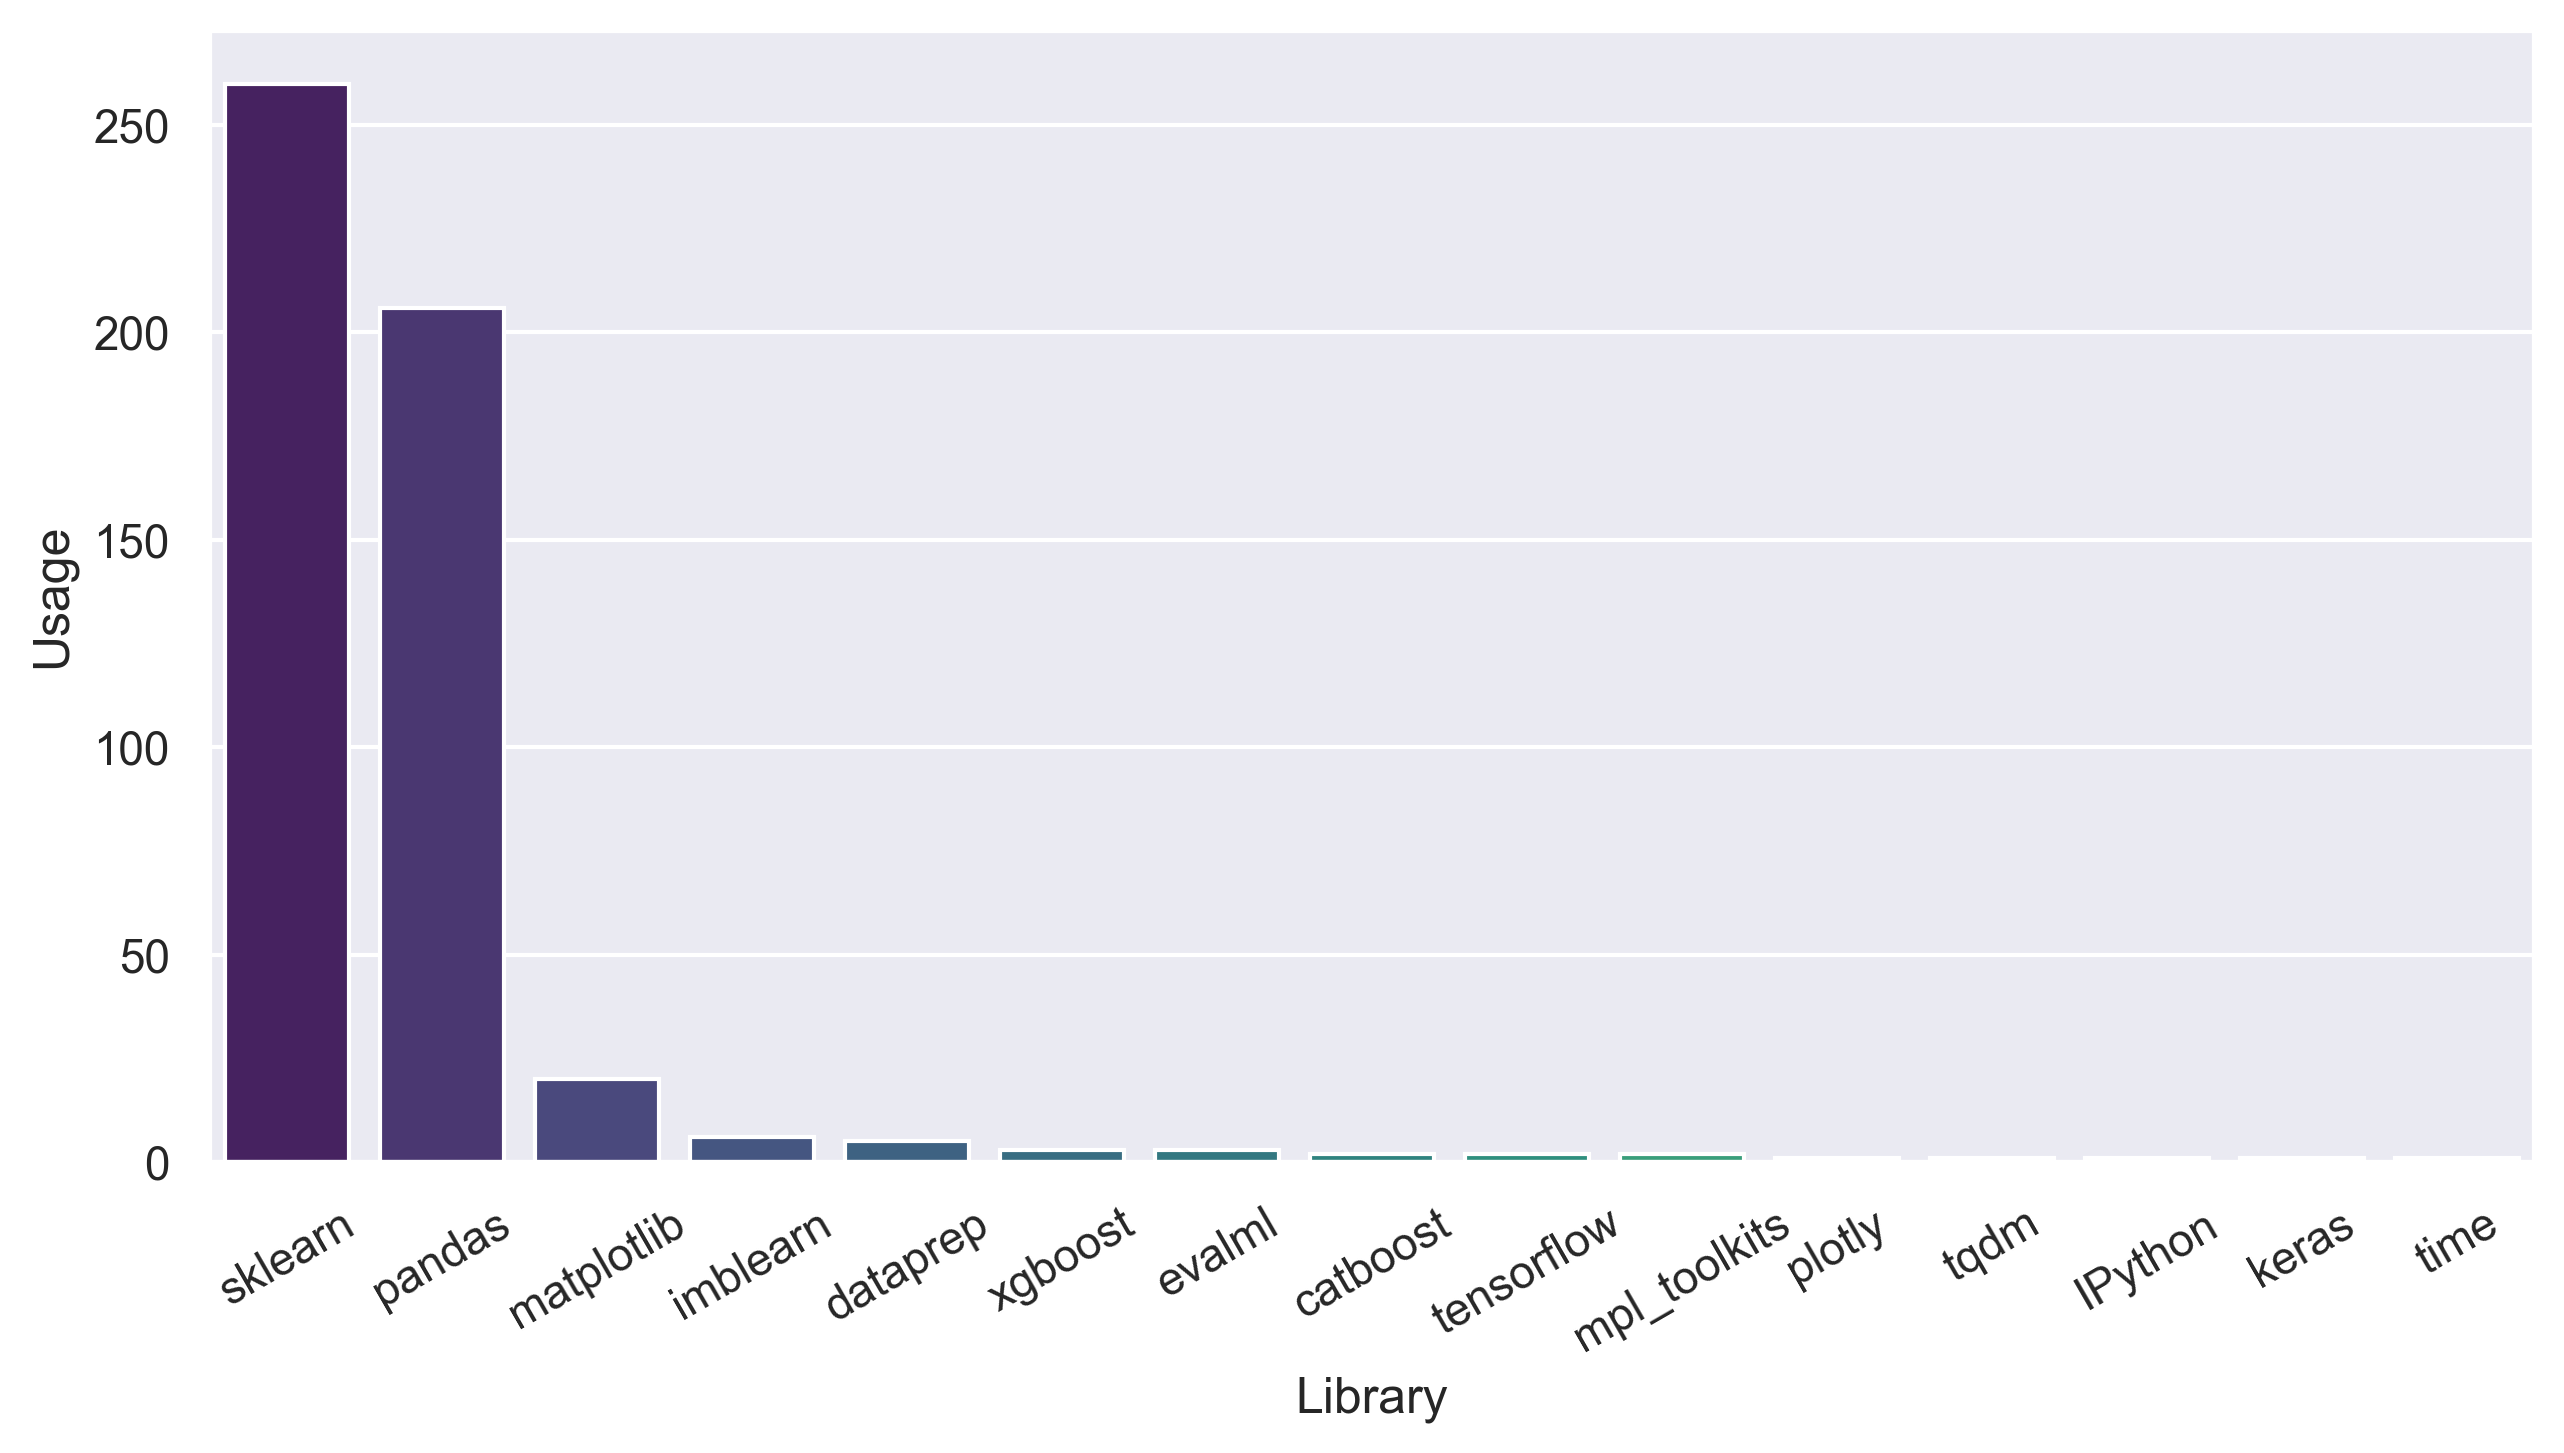

In [21]:
kglids.get_top_k_library_used(dataset='fedesoriano.hepatitis-c-dataset', k=15)